# Bronx

In [26]:
# Loading data
bronx = pd.read_csv('clean_data/bronx.csv')
bronx.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Count_Reviews,Restaurant_Count_Rating,Restaurant_Count_Price,Restaurant_Mean_Distance (m),...,Rat_Mean_Created Day,Rat_Mean_Closed Year,Rat_Mean_Closed Month,Rat_Mean_Closed Day,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Count_Ride Count,Uber_Mean_Month,Uber_Mean_Day,Uber_Mean_Ride Count
0,Bronx,Wakefield,40.894705,-73.847201,10466,23,0,8,22,741.608696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bronx,Co-op City,40.874294,-73.829939,10475,25,0,18,25,749.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bronx,Eastchester,40.887556,-73.827806,10466,25,0,24,25,554.440000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bronx,Fieldston,40.895437,-73.905643,10471,25,0,16,24,875.120000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bronx,Riverdale,40.890834,-73.912585,10463,25,0,23,25,633.560000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### To Drop
- Latitude
- Longitude
- Restaurant_Count_Price

We really only need a count of schools, as not a lot of people rate and review schools. Also don't want price to be involved, as it could be an economic indicator

- School_Mean_Reviews
- School_Mean_Rating 
- School_Sum_Reviews 
- School_Sum_Rating 
- School_Sum_Price 

- Park_Sum_Rating

Again, these aren't really things tend people tend to rate & review, but it might be interesting to see how many people review total

- Transit_Mean_Reviews
- Transit_Mean_Rating
- Transit_Sum_Rating
- Grocery_Sum_Rating

These variables don't actually tell us anything
- Uber_Count_Ride Count
- Uber_Mean_Month
- Uber_Mean_Day 


In [27]:
# bronx.drop(columns=['Restaurant_Count_Price','School_Mean_Reviews',
#                     'School_Mean_Rating','School_Sum_Reviews','School_Sum_Rating','School_Sum_Price',
#                    'Park_Sum_Rating','Transit_Mean_Reviews','Transit_Mean_Rating','Transit_Sum_Rating',
#                    'Grocery_Sum_Rating','Uber_Count_Ride Count','Uber_Mean_Month','Uber_Mean_Day','Rat_Count_Created Date',
#                    'Rat_Count_Closed Date','Rat_Mean_Created Year','Rat_Mean_Created Month','Rat_Mean_Created Day',
#                    'Rat_Mean_Closed Year','Rat_Mean_Closed Month','Rat_Mean_Closed Day','Restaurant_Mean_Reviews',
#                    'Restaurant_Count_Reviews','Restaurant_Count_Rating','Restaurant_Count_Price','Park_Mean_Reviews',
#                    'Park_Sum_Reviews','Transit_Sum_Reviews','Grocery_Mean_Reviews','Grocery_Mean_Rating',
#                    'Grocery_Sum_Reviews','Rat_Sum_Case Open?','Rat_Sum_Days Complaint Open'], inplace=True)

In [28]:
bronx.drop(columns=['Borough','Zipcode','Latitude','Longitude','Restaurant_Count_Price','School_Mean_Reviews',
                    'School_Mean_Rating','School_Sum_Reviews','School_Sum_Rating','School_Sum_Price',
                   'Park_Sum_Rating','Transit_Mean_Reviews','Transit_Mean_Rating','Transit_Sum_Rating',
                   'Grocery_Sum_Rating','Uber_Count_Ride Count','Uber_Mean_Month','Uber_Mean_Day','Rat_Count_Created Date',
                   'Rat_Count_Closed Date','Rat_Mean_Created Year','Rat_Mean_Created Month','Rat_Mean_Created Day',
                   'Rat_Mean_Closed Year','Rat_Mean_Closed Month','Rat_Mean_Closed Day','Restaurant_Mean_Reviews',
                   'Restaurant_Count_Reviews','Restaurant_Count_Rating','Restaurant_Count_Price','Park_Mean_Reviews',
                   'Park_Sum_Reviews','Transit_Sum_Reviews','Grocery_Mean_Reviews','Grocery_Mean_Rating',
                   'Grocery_Sum_Reviews','Rat_Sum_Case Open?','Rat_Sum_Days Complaint Open'], inplace=True)

In [29]:
bronx.fillna(0, inplace=True)

In [30]:
bronx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood                 52 non-null     object 
 1   Restaurant_Count_Name         52 non-null     int64  
 2   Restaurant_Mean_Distance (m)  52 non-null     float64
 3   Restaurant_Mean_Rating        52 non-null     float64
 4   Restaurant_Mean_Price         52 non-null     float64
 5   Restaurant_Sum_Reviews        52 non-null     int64  
 6   Restaurant_Sum_Rating         52 non-null     float64
 7   Restaurant_Sum_Price          52 non-null     int64  
 8   School_Count_Name             52 non-null     float64
 9   Park_Count_Name               52 non-null     float64
 10  Park_Mean_Rating              52 non-null     float64
 11  Transit_Count_Name            52 non-null     float64
 12  Grocery_Count_Name            52 non-null     float64
 13  Rat_Mea

In [31]:
# Numerical encoding of all categorical (nominal) variables
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

In [32]:
# Encode Borough feature
# Encode Neighbourhood feature
Neighbourhood_labels = gle.fit_transform(bronx['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
bronx['NeighbourhoodLabel'] = Neighbourhood_labels

In [33]:
bronx.drop(columns=['Neighbourhood'], inplace=True)

## Scaling

In [34]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [35]:
df_norm = pd.DataFrame(n_scaler.fit_transform(bronx),columns=bronx.columns)

In [36]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(bronx), columns=bronx.columns)

In [37]:
df_robust = pd.DataFrame(r_scaler.fit_transform(bronx), columns=bronx.columns)

## Elbow Rule

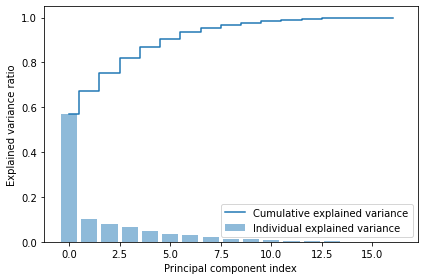

In [38]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [39]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [40]:
df_pca = apply_pca(df_scaled, 5)

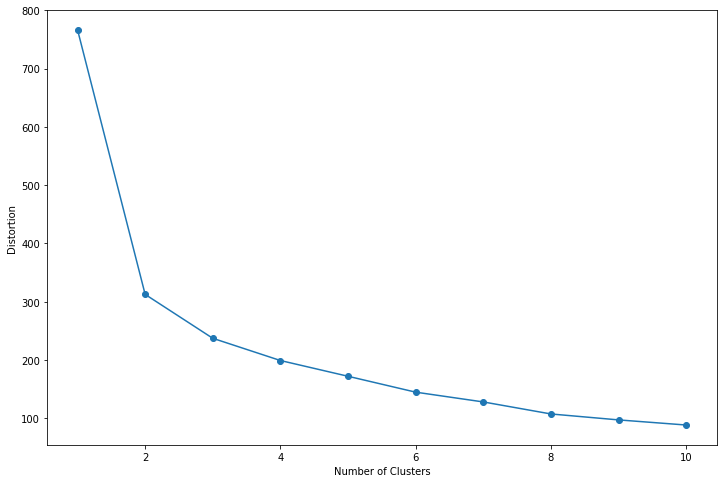

In [41]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

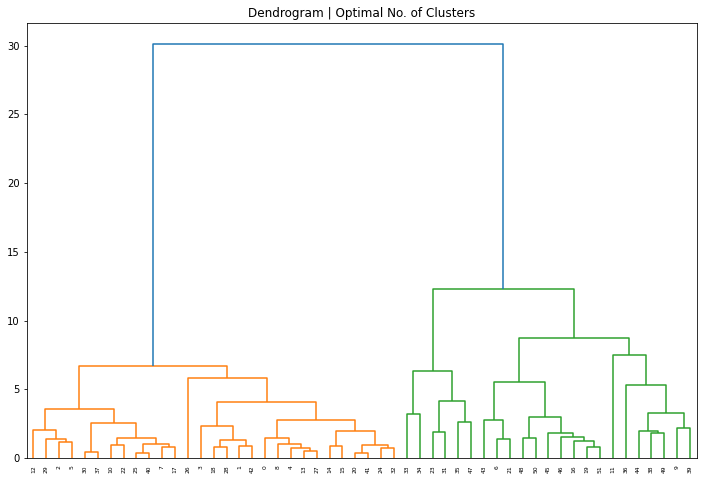

In [42]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

In [43]:
# 2 & 3 clusters

In [44]:
X = df_pca

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [45]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = True):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

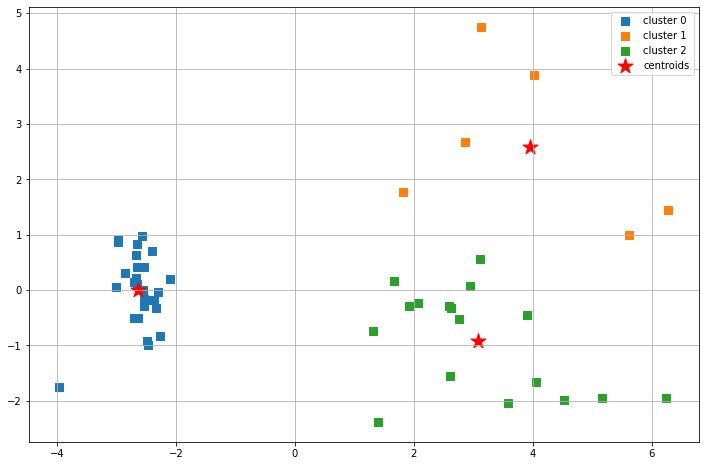

In [46]:
plot_clusters(np.array(df_pca), y_km)

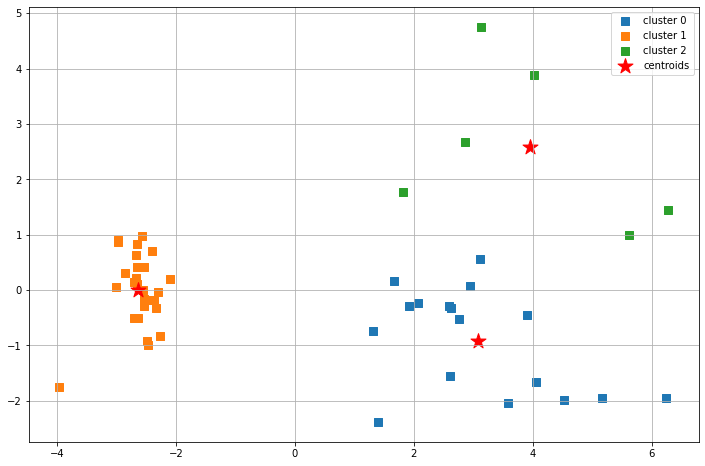

In [47]:
plot_clusters(np.array(X), y_ac)

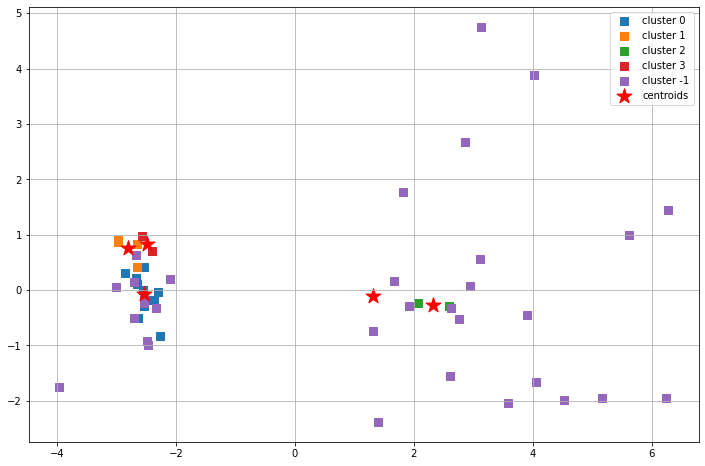

In [48]:
plot_clusters(np.array(X), y_db)

In [49]:
bronx['cluster'] = y_km

In [50]:
bronx_c0 = bronx[bronx['cluster']==0].drop('cluster', axis=1)
bronx_c1 = bronx[bronx['cluster']==1].drop('cluster', axis=1)

In [51]:
df_scaled['cluster'] = y_km

In [52]:
bc0_scaled = df_scaled[df_scaled['cluster']==0].drop('cluster', axis=1)
bc1_scaled = df_scaled[df_scaled['cluster']==1].drop('cluster', axis=1)

In [53]:
bronx_c0.describe()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
count,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.000000
mean,23.862069,638.317431,3.054618,1.415795,0.0,39.797160,30.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.724138
std,3.430162,97.140607,0.681376,0.133146,0.0,22.617713,7.343608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.943500
min,7.000000,455.160000,0.000000,1.181818,0.0,0.000000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
25%,24.000000,554.440000,2.887955,1.318182,0.0,23.450980,29.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.000000
50%,25.000000,641.521739,3.196078,1.409091,0.0,37.313725,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.000000
75%,25.000000,693.240000,3.362745,1.500000,0.0,52.686275,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.000000
max,25.000000,875.120000,3.843137,1.666667,0.0,95.980392,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.000000


In [54]:
bronx_clustered = bronx

In [55]:
bronx_clustered

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel,cluster
0,23,741.608696,3.294118,1.454545,0,26.352941,32,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,47,0
1,25,749.600000,2.882353,1.480000,0,51.882353,37,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,9,0
2,25,554.440000,3.035948,1.480000,0,72.862745,37,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,14,0
3,25,875.120000,3.274510,1.500000,0,52.392157,36,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,17,0
4,25,633.560000,3.431373,1.560000,0,78.921569,39,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,39,0
5,25,532.280000,3.839216,1.400000,0,95.980392,35,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,21,0
6,80,595.822057,3.638829,1.278689,12558,240.162745,78,38.0,5.0,4.020000,32.0,12.0,0.045161,11.574324,0.0,0.0,51,2
7,25,552.360000,2.887955,1.320000,0,40.431373,33,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,32,0
8,25,672.160000,3.843137,1.500000,0,15.372549,30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,50,0
9,58,633.759419,3.361765,1.568627,27375,188.258824,80,25.0,7.0,4.500000,20.0,4.0,0.187500,13.846154,0.0,0.0,1,2


In [56]:
bronx.groupby(['cluster']).mean()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,Restaurant_Sum_Price,School_Count_Name,Park_Count_Name,Park_Mean_Rating,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,NeighbourhoodLabel
cluster,,,,,,,,,,,,,,,,,
0,23.862069,638.317431,3.054618,1.415795,0.000000,39.797160,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,28.724138
1,67.333333,612.455792,3.794599,1.472753,12833.666667,214.750980,82.500000,22.5,21.500000,4.188818,29.833333,10.500000,0.073506,9.973285,3.166667,1.0,28.500000
2,67.294118,614.776620,3.678554,1.474057,15859.235294,207.114418,79.764706,26.0,15.411765,4.185309,28.470588,10.882353,0.070656,10.012182,0.000000,0.0,18.941176
